## Supermarket sales

> 대부분의 인구가 많은 도시에서 슈퍼마켓의 성장은 증가하고 있고 시장 경쟁도 치열합니다.

> 이 데이터 세트는 3개월 동안 3개 지점에서 데이터를 기록한 슈퍼마켓 회사의 과거 매출 중 하나입니다.



* 송장ID : 전산생성 매출전표 송장식별번호

* 지점: 슈퍼센터 지점(A, B, C로 식별되는 3개 지점)

* 도시: 슈퍼센터 위치

* 고객 유형: 회원 카드를 사용하는 고객에 대해 회원이 기록하고 회원 카드를 사용하지 않는 고객에 대해 일반 고객이 기록합니다.

* 성별: 고객의 성별 유형

* 제품 라인: 일반 품목 분류 그룹 - 전자 액세서리, 패션 액세서리, 식음료, 건강 및 미용, 가정 및 라이프스타일, 스포츠 및 여행
맥락

* 단가: 각 제품의 가격($)

* 수량: 고객이 구매한 제품 수

* 세금: 고객 구매 시 5% 세금 수수료

* 총액 : 세금포함 총가격

* 일자 : 구매일자 (2019년 1월~2019년 3월 기록가능)

* 시간 : 구매시간 (오전 10시~오후 9시)

* 결제: 고객이 구매를 위해 사용하는 결제(현금, 신용카드, 지갑 등 3가지 방법 사용 가능)

* COGS: 판매된 상품의 가격

* 총 마진율: 총이익률

* 총 수입: 총소득

* 평가: 고객의 전반적인 쇼핑 경험에 대한 계층화 평가(1~10점 만점)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [ ]:
train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
train.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


* 수치형 데이터
1. 마진율은 모두 4.761905로 동일
2. Total = Unit Price * Quantity + Tax 5% 
3. gross margin percentage = (Total - cogs)/Total
4. Tax 5% = gross income

In [ ]:
train.describe(include = 'O')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


* 범주형
1. 송장ID : 각각의 번호를 가지고 있으며 중복되는 번호는 없다.
2. 지점 : 3개 가지고 있으며 340개를 가지고 있는 A의 개수가 가장 많다.
3. 도시 : 3개를 가지고 있으며 340개를 가지고 있는 Yangon이 가장 많다
4. 고객 유형 : 2개를 가지고 있으며 Member의 개수가 501개로 가장 많다.
5. 성별 : 남자, 여자 2개를 가지고 있으며 여자의 개수가 501개로 가장 많다.
6. 결제 방법 : 현금, 신용카드, 지갑 3가지 경우가 있으며, 그 중 Ewallet이 345개로 가장 많다
7. 제품라인 : 전자 액세서리, 패션 액세서리, 식음료, 건강 및 미용, 가정 및 라이프스타일, 스포츠 및 여행 종류 중 패션의 개수가 가장 많으며 178개를 가지고 있다.

In [ ]:
# 결측값 확인
train.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
train['Date'] = pd.to_datetime(train['Date']) # 날짜 변경 > 추출
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['week'] = train['Date'].dt.weekday # 요일 0 : 월요일 ~ 6 : 일요일
train['Time'] = pd.to_datetime(train['Time']) # 시간 변경 > 추출
train['hour'] = train['Time'].dt.hour

In [ ]:
train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,year,month,week,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2022-12-28 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2022-12-28 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,4,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2022-12-28 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019,3,6,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2022-12-28 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,6,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2022-12-28 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,4,10


In [ ]:
train = train.drop(['Date','Time'],axis = 1)

In [ ]:
train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,year,month,week,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019,3,4,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019,3,6,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,6,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,4,10


## 슈퍼마켓 지점별 분석(Branch)

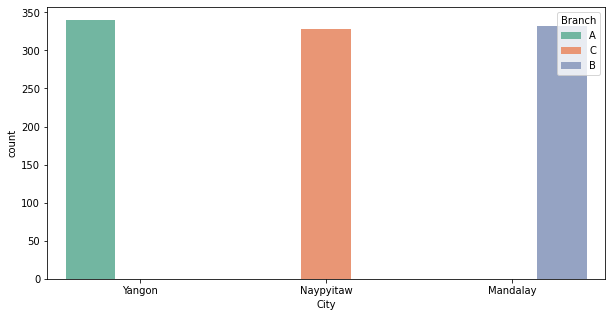

In [ ]:
# 지점과 도시의 상관관계
plt.figure(figsize = (10,5))
sns.countplot(x='City',hue='Branch',data = train, palette = 'Set2')

A : Yangon

B : Mandaly

C : Naypyitaw

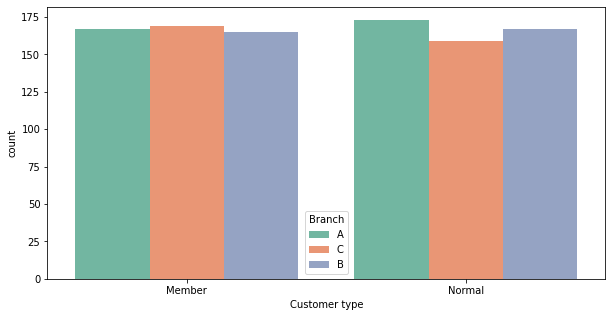

In [ ]:
# 지점별 고객 종류
plt.figure(figsize = (10,5))
sns.countplot(x='Customer type',hue='Branch',data = train, palette = 'Set2')

* 회원고객와 일반고객의 차이가 뚜렷하게 나지는 않지만, A의 경우에서는 일반고객의 경우가 많으며, B에서는 일반고객의 수가 많고, C의 경우에서 회원고객의 수가 더 많다는 것을 파악할 수 있었다. 

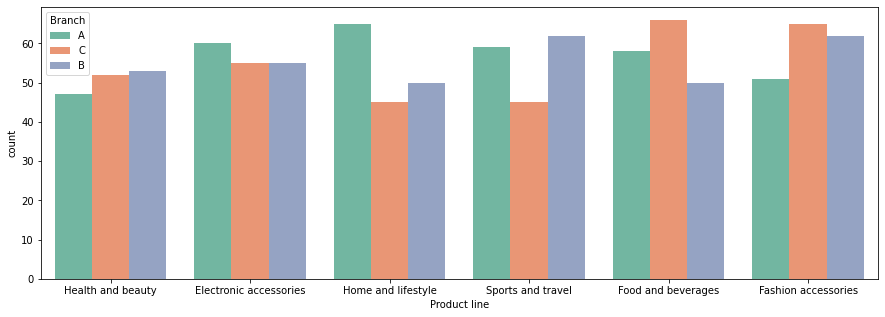

In [ ]:
 # 지점별 생산 제품 라인
plt.figure(figsize = (15,5))
sns.countplot(x='Product line',hue='Branch',data = train, palette = 'Set2')

*  A의 경우에서는 가정 및 라이프 스타일의 수요가 많으며, B의 경우에서는 스포츠와 패션의 수요가 많고, C에서는 음식과 패션의 수요가 많은 것을 볼 수 있다.

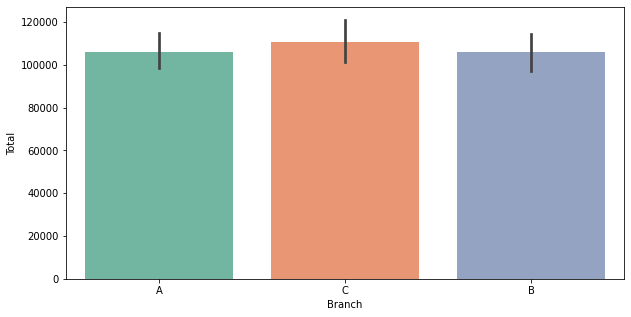

In [ ]:
# 지점별 총 금액
plt.figure(figsize = (10,5))
sns.barplot(x= 'Branch',y= 'Total',data = train, estimator = np.sum, palette = 'Set2') 

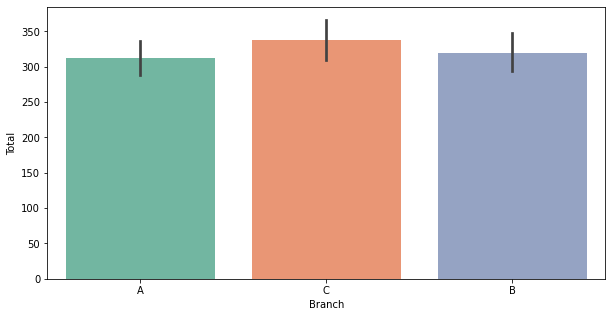

In [ ]:
# 지점별 평균 금액
plt.figure(figsize = (10,5))
sns.barplot(x= 'Branch',y= 'Total',data = train, estimator = np.mean, palette = 'Set2') 

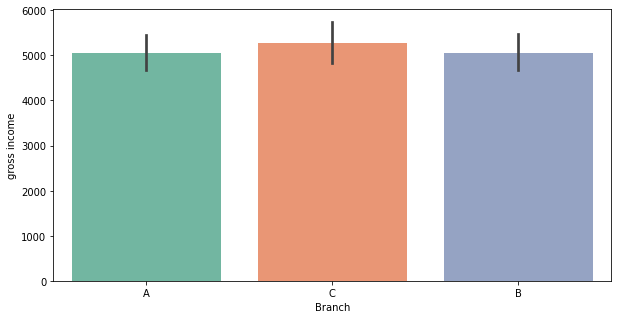

In [ ]:
# 지점별 구매금액
plt.figure(figsize = (10,5))
sns.barplot(x= 'Branch',y= 'gross income',data = train, estimator = np.sum, palette = 'Set2') 

In [ ]:
Branch_Total = train.groupby('Branch').sum()['Total'].sort_values(ascending = False)
Branch_Total

Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Total, dtype: float64

In [ ]:
Branch_Income = train.groupby('Branch').sum()['gross income'].sort_values(ascending = False)
Branch_Income

Branch
C    5265.1765
A    5057.1605
B    5057.0320
Name: gross income, dtype: float64

* 금액의 및 구매금액 합계 순서는 C - A - B

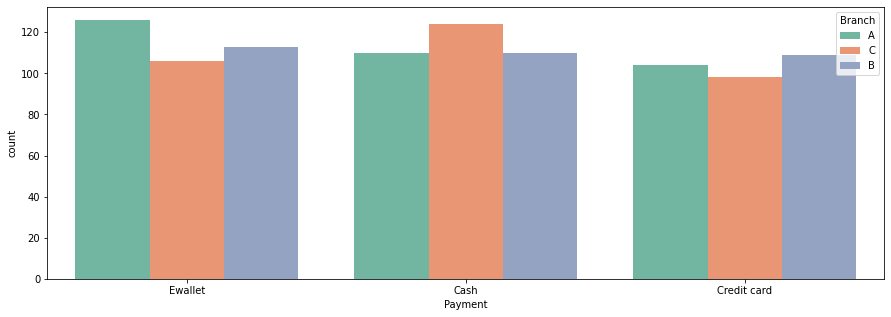

In [ ]:
# 지점별 지불 방식
plt.figure(figsize = (15,5))
sns.countplot(x='Payment',hue='Branch',data = train, palette = 'Set2') 

* 지불 방식 별

A : 지갑 - 현금 - 카드

B : 지갑 - 현금 - 카드

C : 현금 - 지갑 - 카드

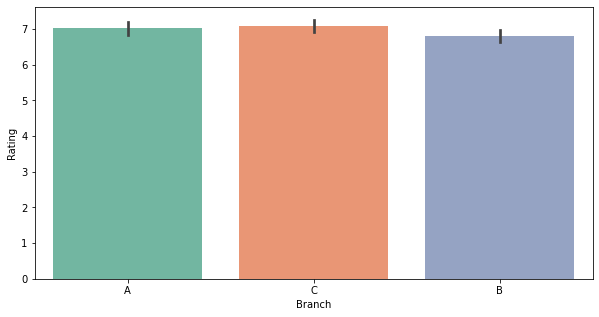

In [ ]:
# 지점별 평점
plt.figure(figsize = (10,5))
sns.barplot(x= 'Branch',y= 'Rating',data = train, estimator = np.mean, palette = 'Set2') 

In [ ]:
Branch_Rating = train.groupby('Branch').mean()['Rating'].sort_values(ascending = False)
Branch_Rating

Branch
C    7.072866
A    7.027059
B    6.818072
Name: Rating, dtype: float64

* 평점 순서 : C - A - B

## 고객 타입별 분석(Customer type)

In [ ]:
train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,year,month,week,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019,3,4,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019,3,6,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,6,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,4,10


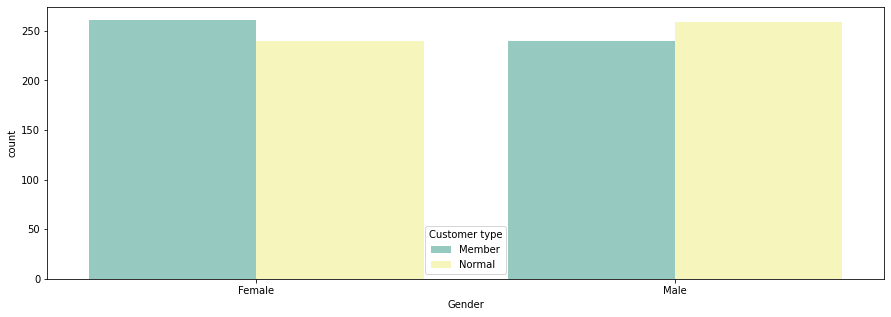

In [ ]:
# 고객타입별 성별
plt.figure(figsize = (15,5))
sns.countplot(x='Gender',hue='Customer type',data = train, palette = 'Set3') 

* 여성의 경우 회원고객의 수가 많았으며, 남성의 경우 일반고객의 수가 더 많은 것을 확인 할 수 있다.

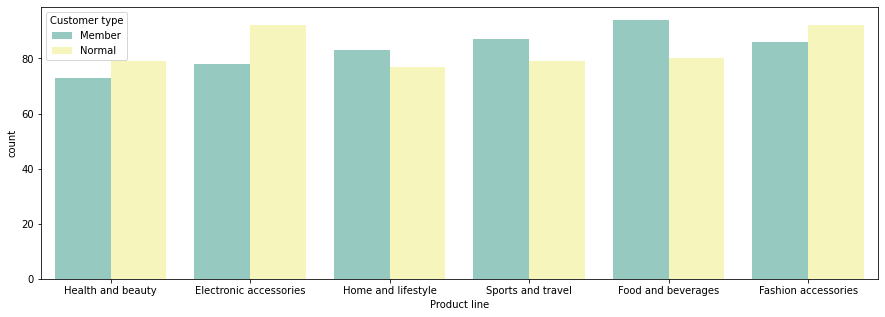

In [ ]:
# 고객타입별 제품 구매횟수
plt.figure(figsize = (15,5))
sns.countplot(x='Product line',hue='Customer type',data = train, palette = 'Set3') 

* 회원 고객은 음식 구매 경우가 가장 많았으며, 일반 고객은 전자기기와 패션 구매 경우가 많은 것을 확인 할 수 있다.

> 이 상황에서 회원과 일반의 차이에서 마트에 자주 방문하는 고객은 회원등록을 할 경우가 큰데, 자주 방문하려면 식품관련된 구매가 빈번할 수 있지 않을까? 라는 의문이 들었다.

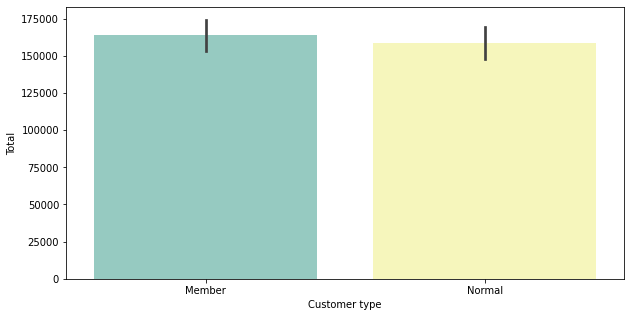

In [ ]:
 # 고객타입별 총 금액
plt.figure(figsize = (10,5))
sns.barplot(x= 'Customer type',y= 'Total',data = train, estimator = np.sum, palette = 'Set3')

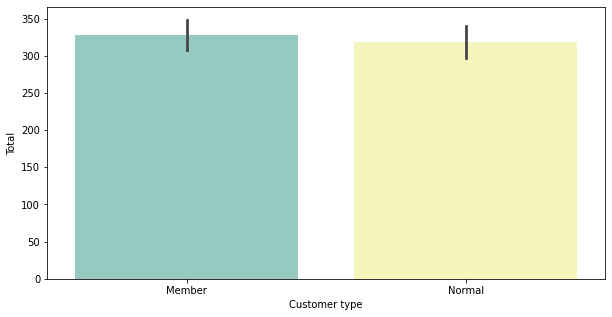

In [ ]:
# 고객타입별 평균 금액
plt.figure(figsize = (10,5))
sns.barplot(x= 'Customer type',y= 'Total',data = train, estimator = np.mean, palette = 'Set3') 

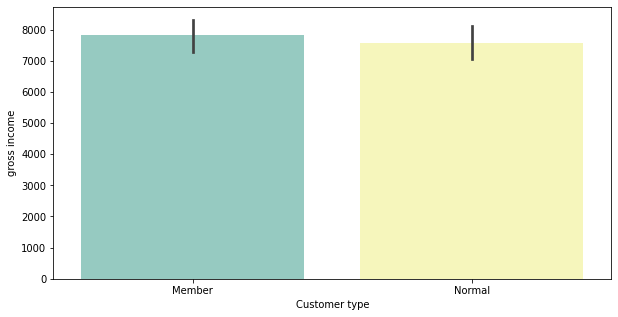

In [ ]:
 # 고객타입별 총 매장 판매 금액
plt.figure(figsize = (10,5))
sns.barplot(x= 'Customer type',y= 'gross income',data = train, estimator = np.sum, palette = 'Set3')

* 회원 고객의 판매금액의 총합, 평균과 매장의 판매금액은 이 일반 고객보다 전체적으로는 많은 것을 볼 수 있다.

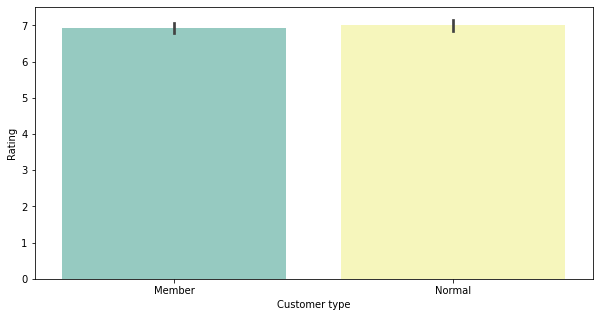

In [ ]:
 # 고객타입별 평점
plt.figure(figsize = (10,5))
sns.barplot(x= 'Customer type',y= 'Rating',data = train, estimator = np.mean, palette = 'Set3')

In [ ]:
Type_Rating = train.groupby('Customer type').mean()['Rating'].sort_values(ascending = False)
Type_Rating

Customer type
Normal    7.005210
Member    6.940319
Name: Rating, dtype: float64

* 평점에 있어서는 일반 고객이 회원 고객보다 근소하게 높은 것을 볼 수 있다.

## 성별별 분석(Gender)

In [ ]:
train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,year,month,week,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019,3,4,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019,3,6,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,6,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,4,10


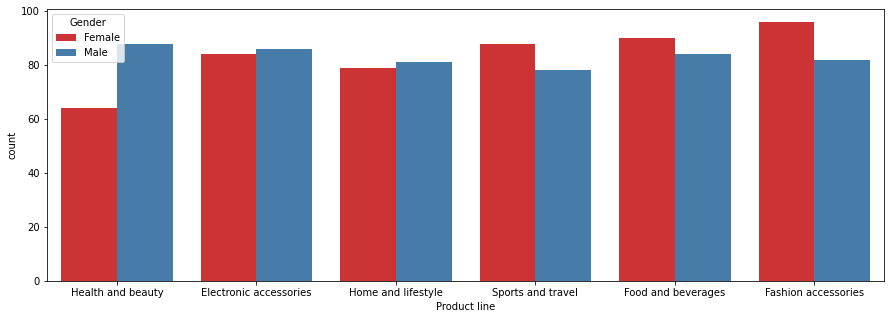

In [ ]:
 # 성별별 제품구매 횟수
plt.figure(figsize = (15,5))
sns.countplot(x='Product line',hue='Gender',data = train, palette = 'Set1')

* 여성의 경우 패션, 식품분야의 구매가 많았으며, 남성의 경우 건강과 미용, 전자 장비의 구매가 많은 것을 확인 할 수 있다.

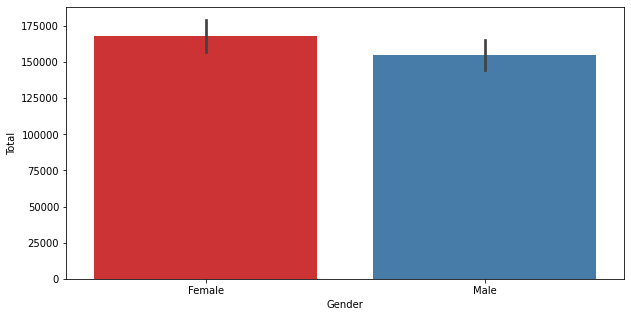

In [ ]:
 # 성별별 구매 총 금액
plt.figure(figsize = (10,5))
sns.barplot(x= 'Gender',y= 'Total',data = train, estimator = np.sum, palette = 'Set1')

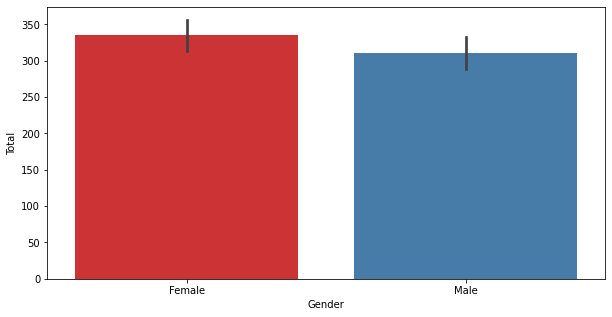

In [ ]:
 # 성별별 구매 평균 금액
plt.figure(figsize = (10,5))
sns.barplot(x= 'Gender',y= 'Total',data = train, estimator = np.mean, palette = 'Set1')

* 여성의 경우 총 구매 금액 및 평균 구매 금액이 남성보다 많은 것을 확인 할 수 있다.

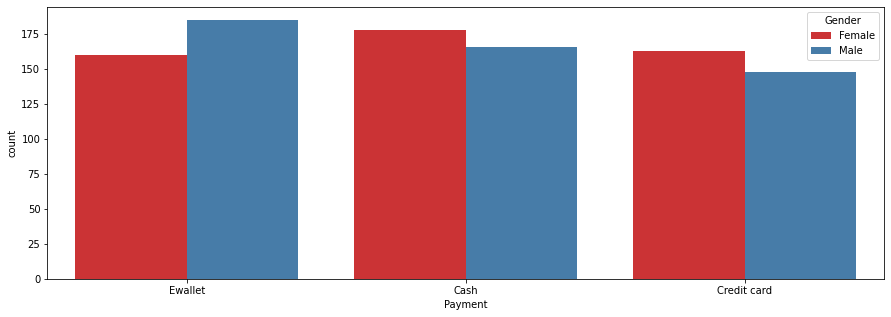

In [ ]:
 # 성별별 지불 방법
plt.figure(figsize = (15,5))
sns.countplot(x='Payment',hue='Gender',data = train, palette = 'Set1')

* 지불방법

남성 : 지감 - 현금 - 카드

여성 : 현금 - 카드 - 지갑 

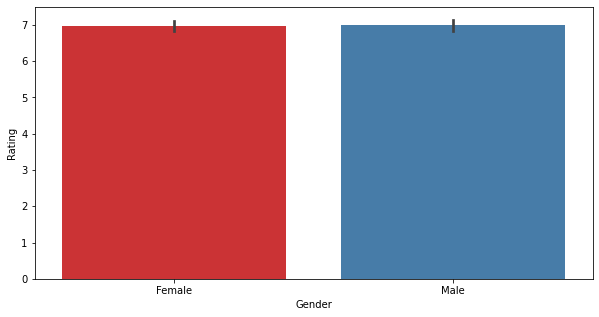

In [ ]:
# 성별별 평점 평균
plt.figure(figsize = (10,5))
sns.barplot(x= 'Gender',y= 'Rating',data = train, estimator = np.mean, palette = 'Set1') 

In [ ]:
Gender_Rating = train.groupby('Gender').mean()['Rating'].sort_values(ascending = False)
Gender_Rating

Gender
Male      6.980962
Female    6.964471
Name: Rating, dtype: float64

* 평점의 경우 근소하게 남자가 높은 것을 확인 할 수 있다.

## 제품 라인별 분석(Product line)

In [ ]:
train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,year,month,week,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019,3,4,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019,3,6,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,6,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,4,10


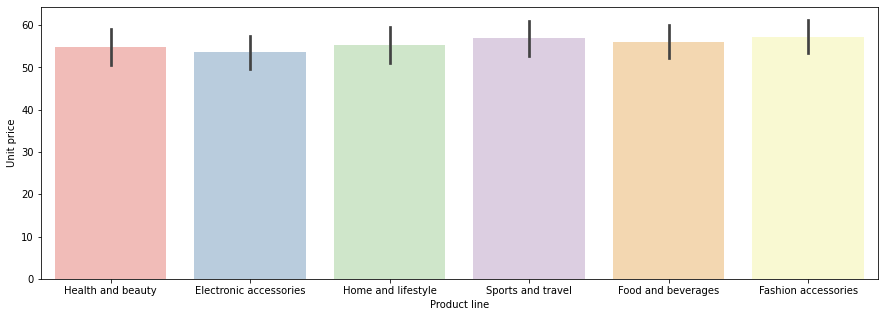

In [ ]:
 # 제품별 금액 
plt.figure(figsize = (15,5))
sns.barplot(x= 'Product line',y= 'Unit price',data = train, estimator = np.mean, palette = 'Pastel1')

In [ ]:
Product_Unit_Mean = train.groupby('Product line').mean()['Unit price'].sort_values(ascending = False)
Product_Unit_Mean

Product line
Fashion accessories       57.153652
Sports and travel         56.993253
Food and beverages        56.008851
Home and lifestyle        55.316937
Health and beauty         54.854474
Electronic accessories    53.551588
Name: Unit price, dtype: float64

* 제품 별 금액
> 패션 악세사리 제품이 가장 가격이 높았지만, 제일 높은 금액과 제일 낮은 금액의 차이가 4로 차이가 크다고 할 수는 없다.

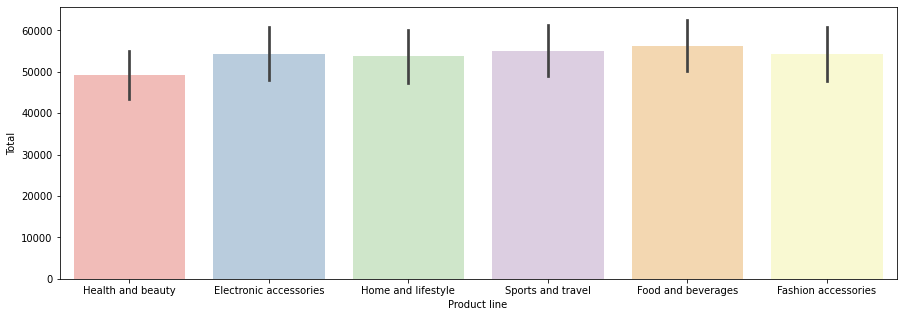

In [ ]:
 # 제품별 구매금액 총합
plt.figure(figsize = (15,5))
sns.barplot(x= 'Product line',y= 'Total',data = train, estimator = np.sum, palette = 'Pastel1')

In [ ]:
Product_Total_Sum = train.groupby('Product line').sum()['Total'].sort_values(ascending = False)
Product_Total_Sum

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

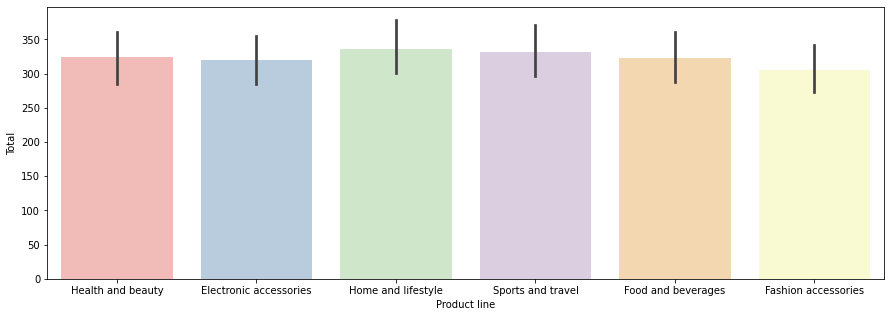

In [ ]:
 # 제품별 구매금액 평균
plt.figure(figsize = (15,5))
sns.barplot(x= 'Product line',y= 'Total',data = train, estimator = np.mean, palette = 'Pastel1')

In [ ]:
Product_Total_Mean = train.groupby('Product line').mean()['Total'].sort_values(ascending = False)
Product_Total_Mean

Product line
Home and lifestyle        336.636956
Sports and travel         332.065220
Health and beauty         323.643020
Food and beverages        322.671517
Electronic accessories    319.632538
Fashion accessories       305.089298
Name: Total, dtype: float64

* 제품별 구매금액 총합에서는 식품과 스포츠가 1, 2등을 차지 했지만 평균 구매금액에서는 가정 및 라이프스타일과 스포츠가 1, 2등을 차지했다.

> 이를 통해 평균적 구매금액에 있어서는 가정 및 라이프 스타일이 높지만, 수요가 다른거에 비해 적은 것을 볼 수 있다.

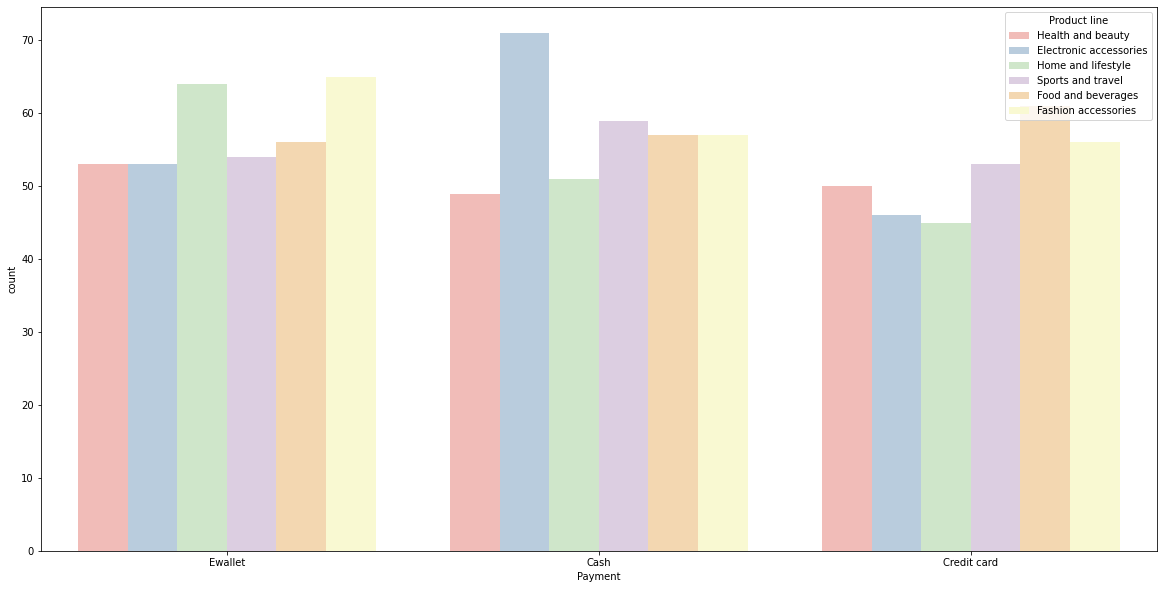

In [ ]:
 # 제품별 지불 방식
plt.figure(figsize = (20,10))
sns.countplot(x='Payment',hue='Product line',data = train, palette = 'Pastel1')

* 지불방식
1. 지갑을 이용한 지불은 패션과 가정 및 라이프 스타일이 많았다.
2. 현금으로는 전자 악세서리의 지불이 많았다.
3. 카드를 이용해서는 식품의 구매가 많았다.

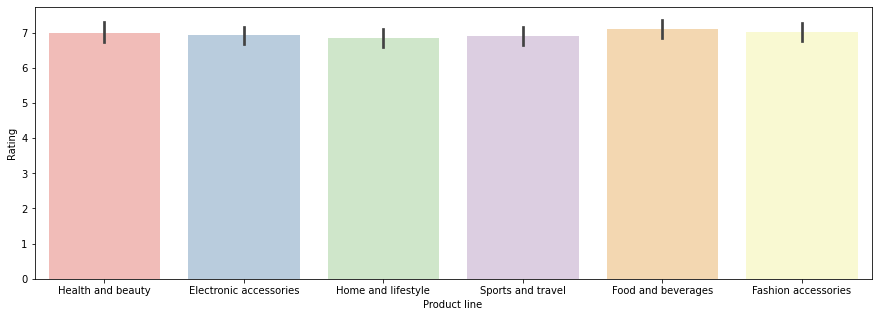

In [ ]:
# 제품별 평점
plt.figure(figsize = (15,5))
sns.barplot(x= 'Product line',y= 'Rating',data = train, estimator = np.mean, palette = 'Pastel1') 

In [ ]:
Product_Rating = train.groupby('Product line').mean()['Rating'].sort_values(ascending = False)
Product_Rating

Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64

* 식품과 관련된 평점이 가장 좋으며, 그 뒤로 패션과 건강 부분이 있다.

## 시간대별 분석(Hour / Month / Week)

In [ ]:
train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,year,month,week,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019,3,4,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019,3,6,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,6,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,4,10


### 1. 지점별 분석

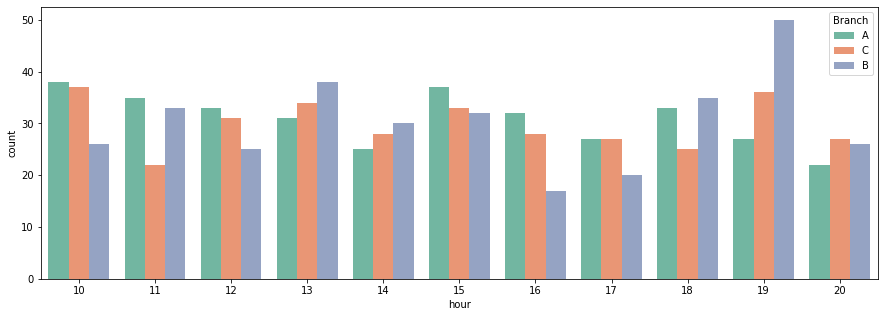

In [ ]:
 # 시간대별 방문 횟수 - 지점
plt.figure(figsize = (15,5))
sns.countplot(x='hour',hue='Branch',data = train, palette = 'Set2')

* A : 10시, 15시 순서로 높은 것을 확인 할 수 있다.
* B : 19시가 압도적으로 높으며, 다음으로 13시가 높다.
* C : 10시와 13시 19시 순서로 높은 것을 확인 할 수 있다.

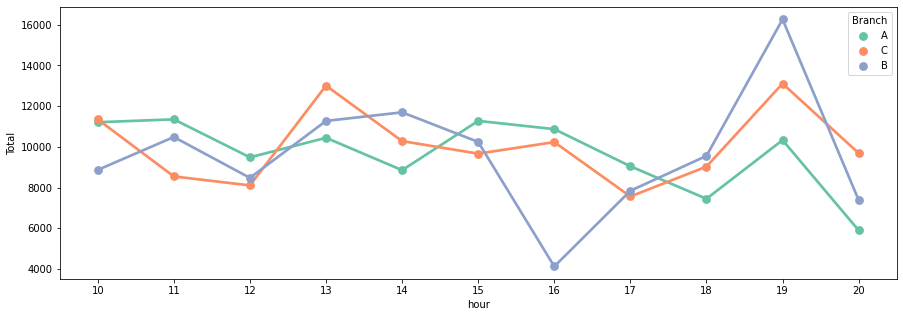

In [ ]:
# 시간대별 총 구매금액 - 지점
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='hour', y='Total', ci = None, estimator = np.sum, hue ='Branch', palette = 'Set2') # ci : 표준편차 제거

* A의 경우 완만하지만 20시에 가장 구매금액이 낮을 것을 확인 할 수 있으며
* B의 경우 16시의 경우 구매금액이 가장 낮은 것과 19시에 가장 높은 것을 확인 할 수 있다.
* C의 경우 13시와 19시가 높은 것을 알수 있으며 17시가 가장 낮을 것을 확인 할 수 있다.

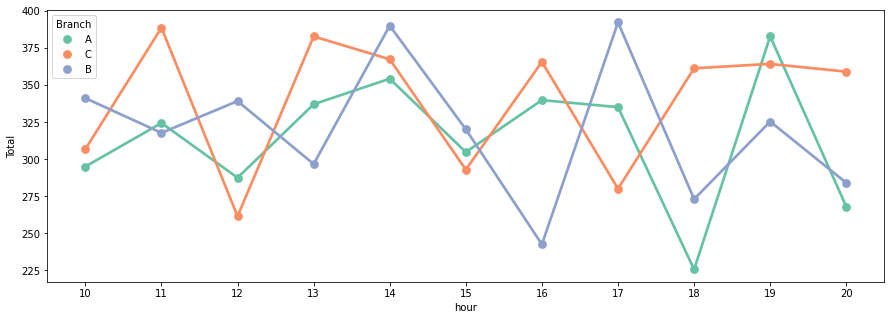

In [ ]:
# 시간대별 평균 구매금액 - 지점
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='hour', y='Total', ci = None, estimator = np.mean, hue ='Branch', palette = 'Set2')

* A의 경우 18시의 경우 평균구매금액이 가장 낮으며, 19시에 가장 높은 것을 볼수있다.
* B의 경우 14시, 17시가 높으며, 16시가 가장 낮은 것을 볼 수 있다.
* C의 경우 11시와 13시가 차례대로 높으며 12시가 가장 낮은 것을 볼 수 있다.

> 평균 구매금액과 총 구매금액을 비교 했을 때, 총 구매금액이 높다고 평균 구매금액이 높은 것은 아니며, 이 결론은 이 시간에 고객이 많이 방문 했다는 것을 판단할 수 있다.

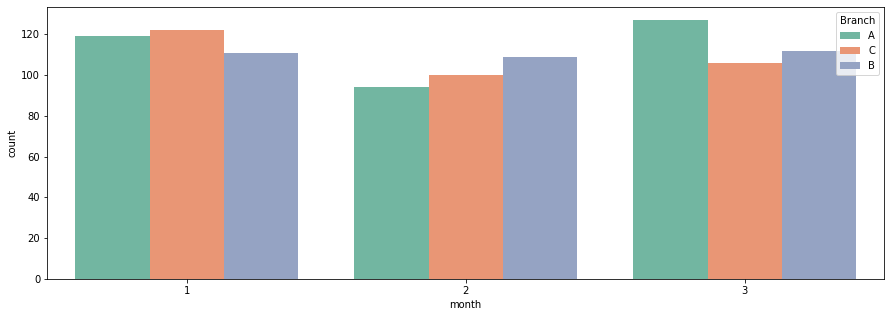

In [ ]:
# 월별 방문 횟수 - 지점
plt.figure(figsize = (15,5))
sns.countplot(x='month',hue='Branch',data = train, palette = 'Set2')

* A의 경우 3월이 가장 높고 2월이 가장 낮은 것을 확인 할 수 있다.
* B의 경우에서는 대부분 3개월동안 인원수에 있어서 차이가 많이 나지 않는 것을 확인 할 수 있다.
* C의 경우에서는 1월에 가장 많이 방문했으며 2월에 가장 낮은 것을 확인 할 수 있다.

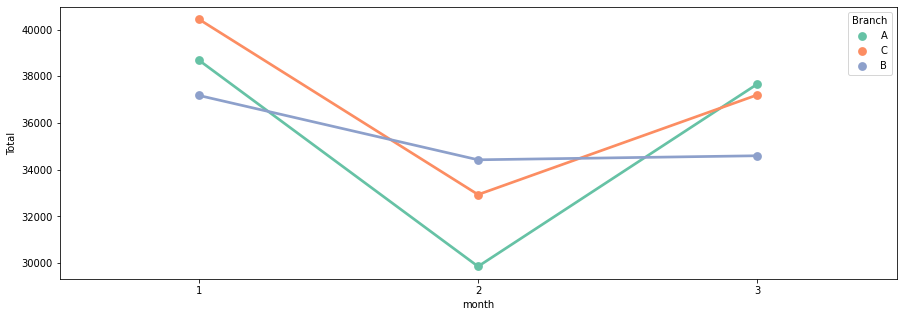

In [ ]:
# 월별 총 구매금액 - 지점
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='month', y='Total', ci = None, estimator = np.sum, hue ='Branch', palette = 'Set2') 

* A와 C의 지점에서는 2월에 총 구매금액이 가장 작은 것을 확인 할 수 있다.
* 또한, 모든 지점이 1월이 가장 총 구매금액이 많다.
* B의 경우에서는 1월이 가장 많으며 그 이후 2, 3월 은 계속 줄어드는 것을 확인 할 수 있다.

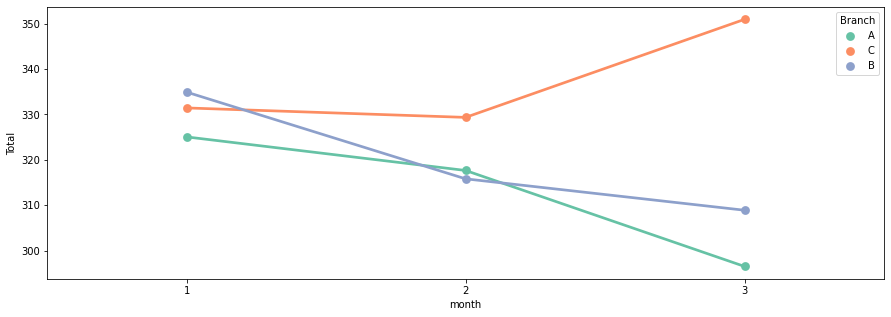

In [ ]:
# 월별 평균 구매금액 - 지점
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='month', y='Total', ci = None, estimator = np.mean, hue ='Branch', palette = 'Set2') 

* 평균 구매금액에서는 A와 B는 1월이 가장 많고 그 이후로 줄어들지만, C의 경우 3월이 평균 구매금액이 높은 것을 확인 할 수 있다.

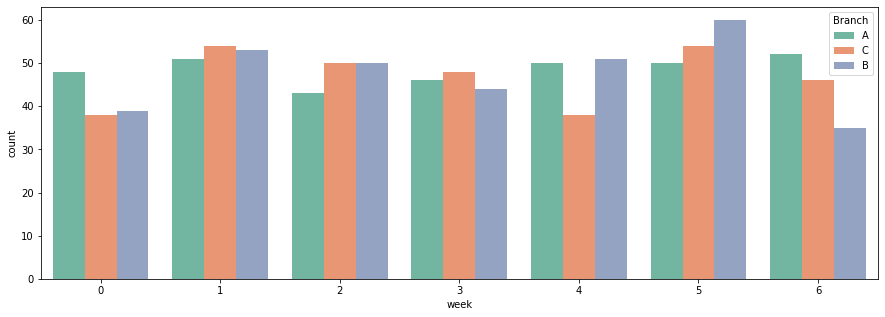

In [ ]:
# 요일별 방문 횟수 - 지점 
# 0 : 월요일 ~ 6 : 일요일
plt.figure(figsize = (15,5))
sns.countplot(x='week',hue='Branch',data = train, palette = 'Set2')

* B지점에서는 토요일에 방문 횟수가 가장 많으며, 일요일이 가장 적다.

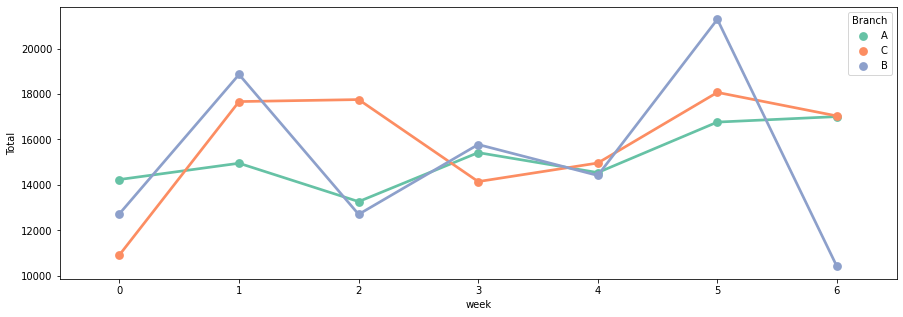

In [ ]:
# 요일별 총 구매금액 - 지점
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='week', y='Total', ci = None, estimator = np.sum, hue ='Branch', palette = 'Set2') 

* B지점의 총 구매금액이 토요일에 가장 많으며, 일요일에 가장 적다.
* C지점은 월요일이 다른 요일에 비해 구매금액이 가장 적다.

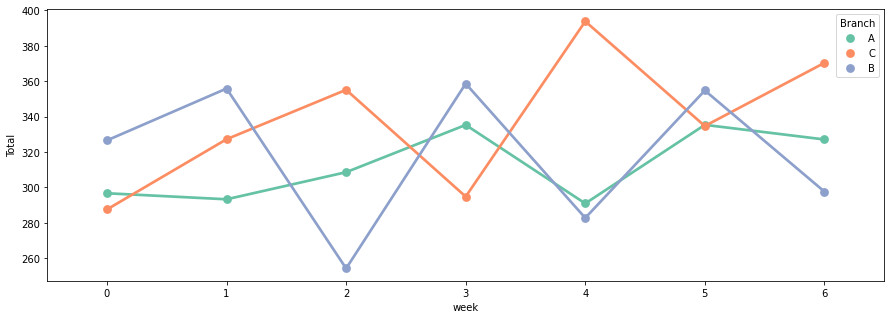

In [ ]:
# 요일별 평균 구매금액 - 지점
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='week', y='Total', ci = None, estimator = np.mean, hue ='Branch', palette = 'Set2') 

* 평균 구매금액은 B에서는 수요일에 가장 적었으며, C의 금요일이 가장 많았다.

### 2. 제품별 분석

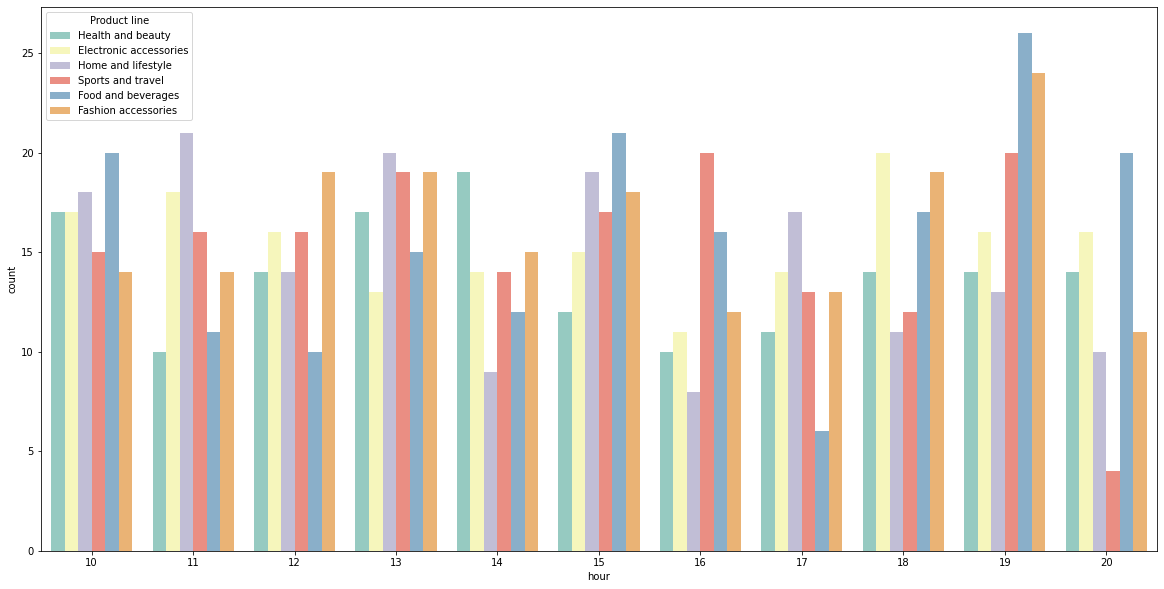

In [ ]:
 # 시간대별 제품 구매 횟수
plt.figure(figsize = (20,10))
sns.countplot(x='hour',hue='Product line',data = train, palette = 'Set3')

* 시간대별 제품 구매 횟수 그래프
* 음식과 음료 관련된 구매는 10시 15시 19시 20시에서 다른 제품들보다 많은 구매를 확인 할 수 있다
* 가정과 라이프 스타일 부분은 11시 13시에서 다른 제품들보다 많은 구매를 확인 할 수 있다.
* 패션과 악세사리 부분은 12시에서 다른 제품들보다 많은 구매를 확인 할 수 있지만 19시에 가장 많은 구매가 이루어 졌다.
* 스포츠와 여가 부분에서는 16시에 다른 제품들보다 많은 구매를 확인 할 수 있다.

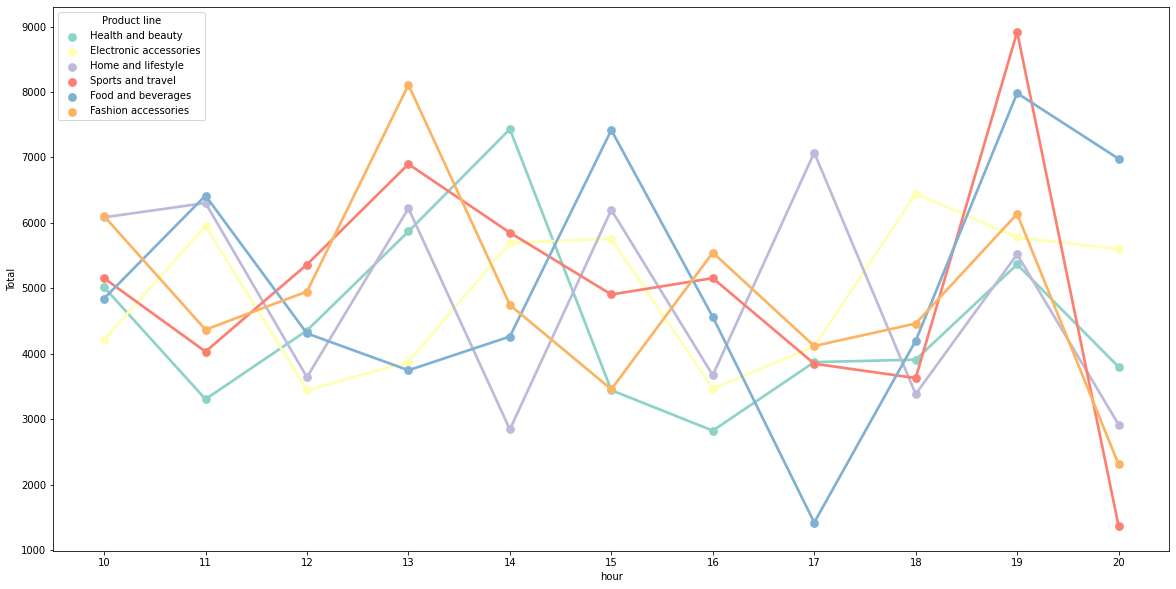

In [ ]:
# 시간대별 총 구매금액 - 제품
plt.figure(figsize = (20,10))
sns.pointplot(data=train, x='hour', y='Total', ci = None, estimator = np.sum, hue ='Product line', palette = 'Set3') 

* 패션부분의 구매금액은 13시에 가장 높다
* 식품관련 구매는는 17시에 가장 낮고, 19시 20시 15시에 높은 것을 확인 할 수 있다.
* 건강 관련 구매는 14시에 가장 높다.
* 스포츠 분야의 구매는 대부분 19시에 이루어 지는 것을 볼 수 있으며 20시에는 다른 분야의 구매보다 더 적어 감소폭이 최대인 것을 확인 할 수 있다.

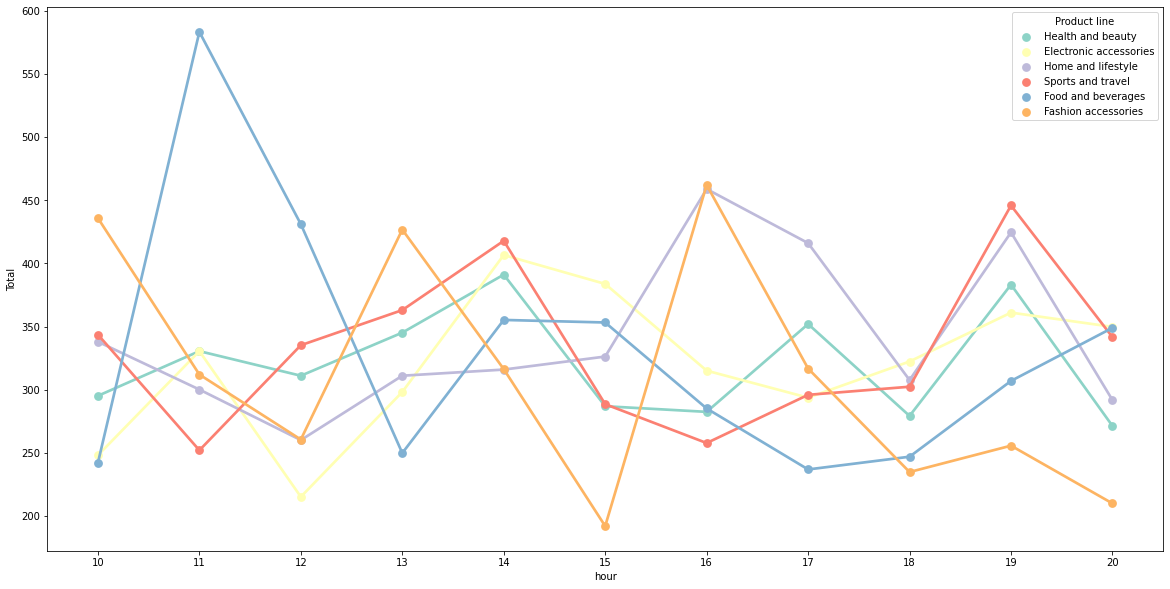

In [ ]:
# 시간대별 평균 구매금액 - 제품
plt.figure(figsize = (20,10))
sns.pointplot(data=train, x='hour', y='Total', ci = None, estimator = np.mean, hue ='Product line', palette = 'Set3')

* 구매 금액의 평균을 확인 해 볼때, 11시에 음식과 음료에관한 구매의 가격이 가장 높은 것을 확인 할 수 있다

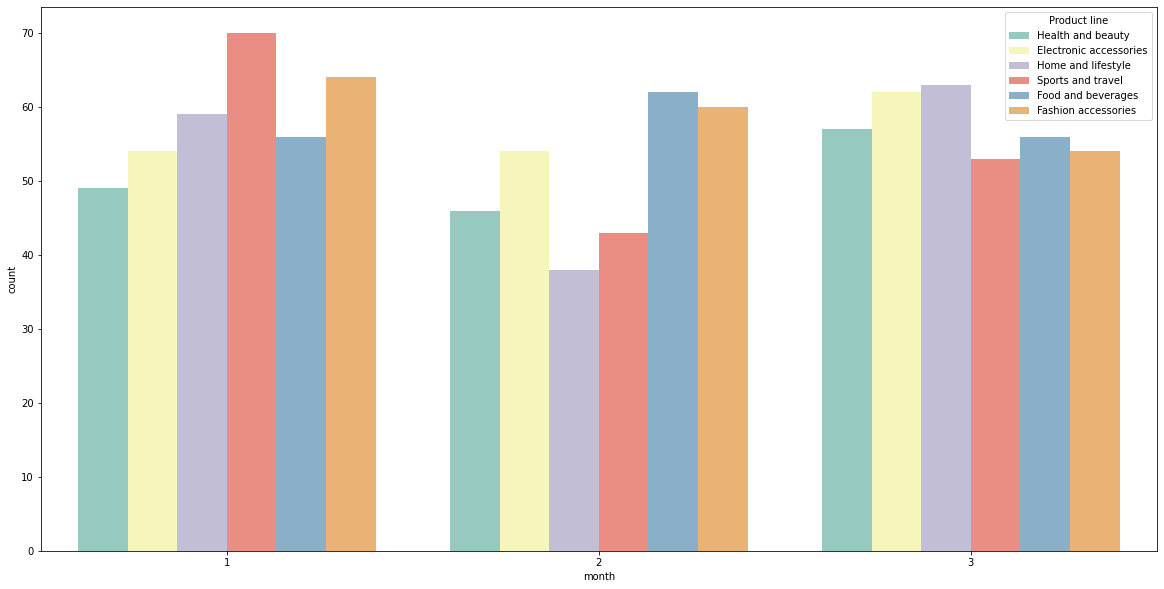

In [ ]:
 # 월별 제품 구매 횟수
plt.figure(figsize = (20,10))
sns.countplot(x='month',hue='Product line',data = train, palette = 'Set3')

* 월별 구매 횟수를 볼 때 1월에는 스포츠 분야의 구매가 가장 많고 건강 분야의 구매가 가장 적은 것을 확인 할 수 있다.
* 2월에는 음식분야의 구매가 가장 많고, 가정과 라이프스타일 분야의 구매가 가장 적은 것을 확인 할 수 있다.
* 3월에는 가정과 라이프스타일의 구매가 가장 많고 스포츠 분야 구매가 가장 적은 것을 확인 할 수 있다.

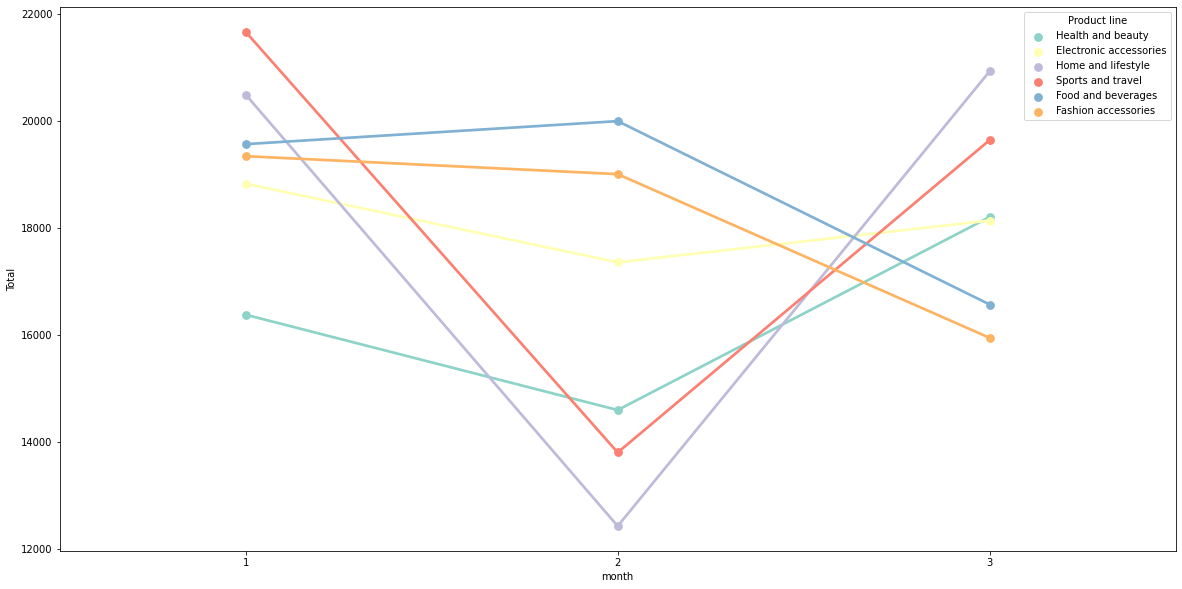

In [ ]:
# 월별 총 구매금액 - 제품
plt.figure(figsize = (20,10))
sns.pointplot(data=train, x='month', y='Total', ci = None, estimator = np.sum, hue ='Product line', palette = 'Set3') 

* 월별 총 구매금액 부분에서 1월에는 스포츠 분야가 2월에는 음식과 식품관련 3월에는 가정과 라이프 스타일 부분의 구매금액이 많은 것을 확인 할 수 있다.
* 1월의 건강 부분의 구매금액이 가장 낮으며 2월에는 가정과 라이프스타일 부분의 구매금액이 가장 낮고, 3월에는 패션 분야의 구매금액이 가장 낮은 것을 확인 할 수 있다.

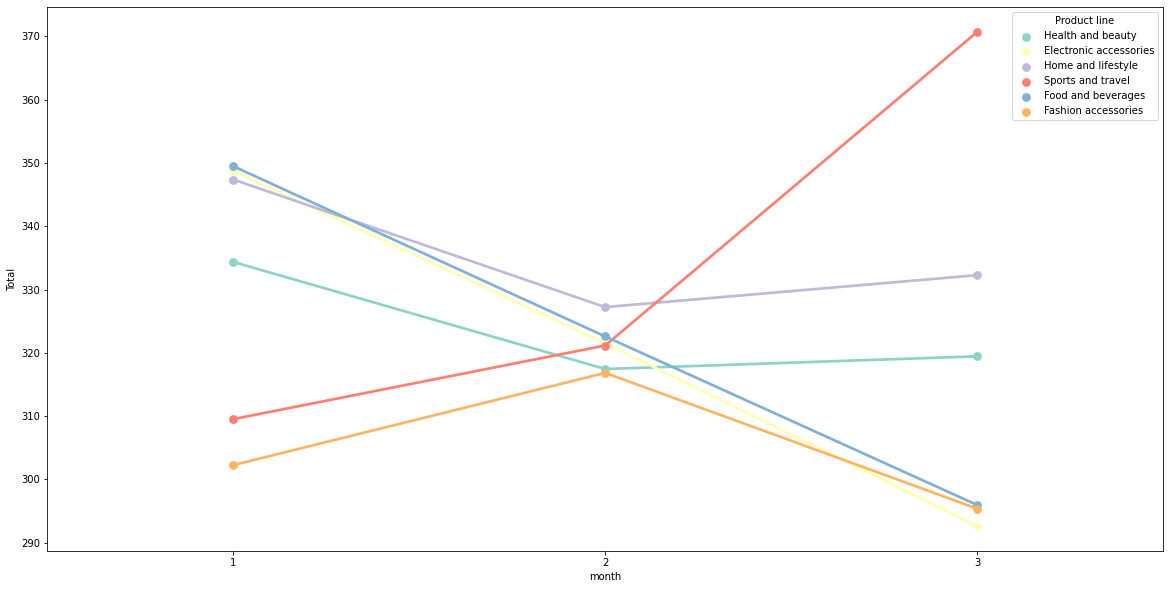

In [ ]:
# 월별 평균 구매금액 - 제품
plt.figure(figsize = (20,10))
sns.pointplot(data=train, x='month', y='Total', ci = None, estimator = np.mean, hue ='Product line', palette = 'Set3') 

* 월별 평균 구매금액을 볼 때, 스포츠 분야의 구매금액이 3월에 두드러지게 높은 것을 확인 할 수 있다.

> 이처럼 평균 구매금액의 부분과 총 구매금액의 부분의 순위에는 차이가 나는 것을 확인 할 수 있고, 이는 평균 구매금액이 높더라도 사는 고객의 수가 총 구매금액에 영향을 미친다는 것을 확인 할 수 있다.

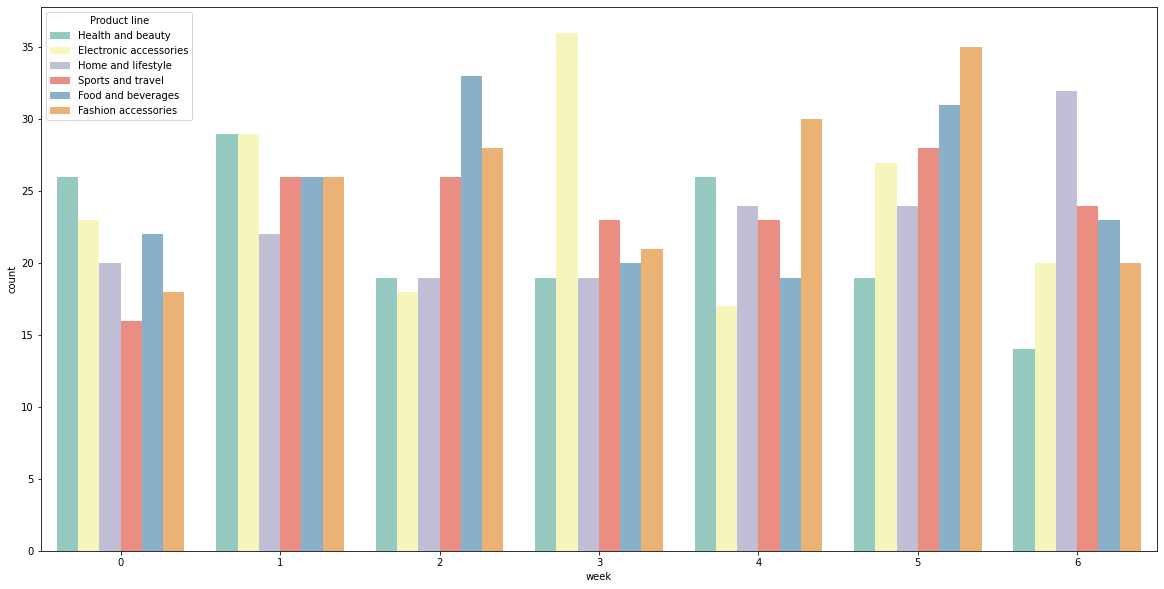

In [ ]:
 # 요일별 제품 구매 횟수
plt.figure(figsize = (20,10))
sns.countplot(x='week',hue='Product line',data = train, palette = 'Set3')

* 월요일 : 건강 분야의 수요가 가장 높고 스포츠 분야의 수요가 가장 적다.
* 화요일 : 건강 분야와 전자제품 분야의 수요가 가장 높고 가정과 라이프스타일 분야의 수요가 가장 낮다
* 수요일 : 식품 분야의 수요가 가장 높고 전자제품 분야의 수요가 가장 낮다
* 목요일 : 전자제품 분야의 수요가 가장 높고(전체 중에서 가장 높은 수요) 건강 분야와 가정분야의 수요가 가장 낮다.
* 금요일 : 패션 분야의 수요가 가장 높고 전자제품 분야의 수요가 가장 낮다.
* 토요일 : 패션분야의 수요가 가장 높고 건강 분야의 수요가 가장 낮다.
* 일요일 : 가정 분야의 수요가 가장 높고 건강분야의 수요가 가장 낮다(전체 중에서 가장 낮은 수요)

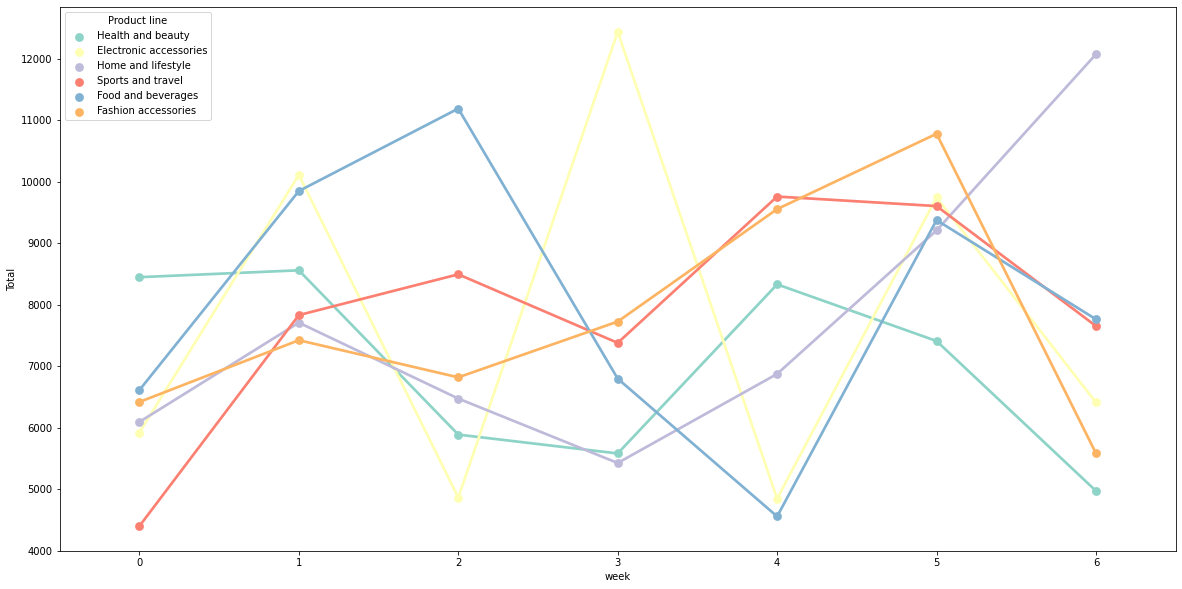

In [ ]:
# 요일별 총 구매금액 - 제품
plt.figure(figsize = (20,10))
sns.pointplot(data=train, x='week', y='Total', ci = None, estimator = np.sum, hue ='Product line', palette = 'Set3') 

* 총 구매금액의 가장 높은 부분 : 목요일의 전자제품 분야 구매금액이 가장 높으며 그 다음으로 일요일의 가정 분야의 구매금액이 높다.
* 총 구매금액의 가장 낮은 부분 : 월요일의 스포츠 분야의 수요가 가장 낮으며 그이후 금요일의 음식 분야의 수요가 낮다.

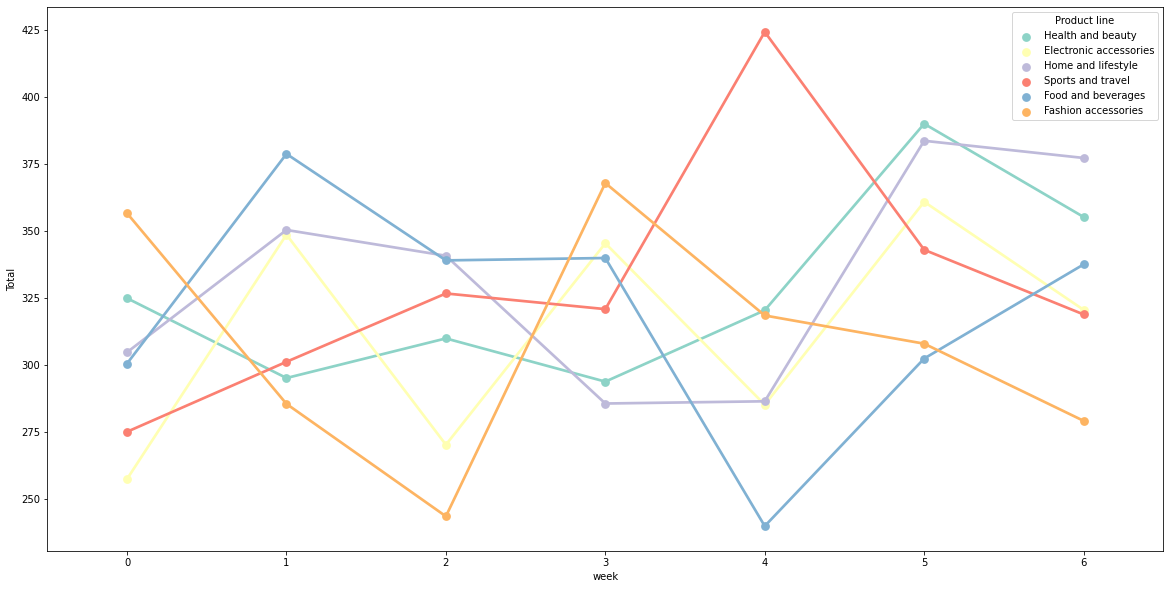

In [ ]:
# 요일별 평균 구매금액 - 제품
plt.figure(figsize = (20,10))
sns.pointplot(data=train, x='week', y='Total', ci = None, estimator = np.mean, hue ='Product line', palette = 'Set3') 

* 평균금액은 금요일의 스포츠 분야의 금액이 가장 높고, 화요일의 패션 분야와 금요일의 음식 분야가 낮은 것을 확인 할 수 있다.

### 3. 성별별 분석

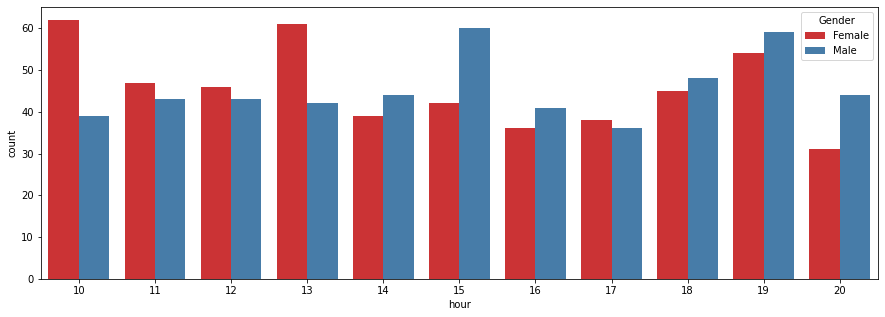

In [ ]:
 # 시간별 성별 방문 횟수
plt.figure(figsize = (15,5))
sns.countplot(x='hour',hue='Gender',data = train, palette = 'Set1')

* 여성의 경우 10시 13시 19시에 많이 방문 하는 것을 확인 할 수 있다.
* 남성의 경우 15시와 19시에 많이 방문 하는 것을 확인 할 수 있다.


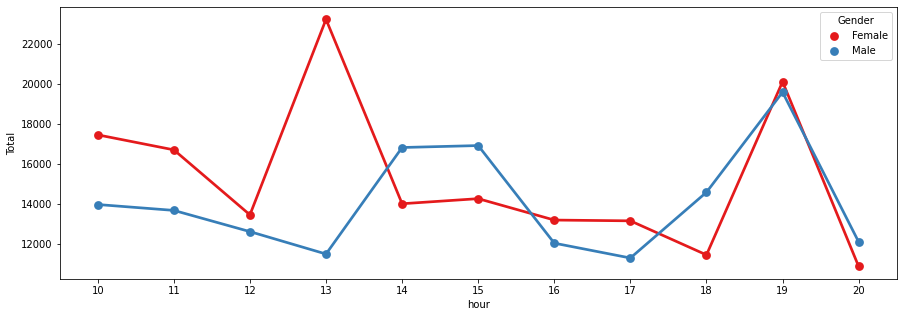

In [ ]:
# 시간별 총 구매금액 - 성별
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='hour', y='Total', ci = None, estimator = np.sum, hue ='Gender', palette = 'Set1')

* 남성의 경우 19시의 총 구매금액이 높은 것을 확인 할 수 있다.
* 여성의 경우 13시의 총 구매금액이 높은 것을 확인 할 수 있다.

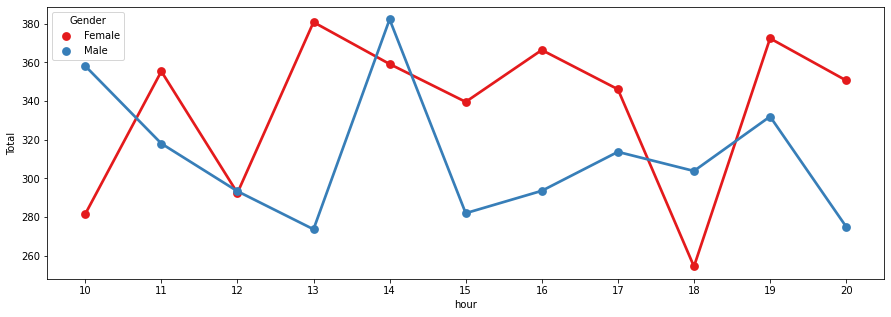

In [ ]:
# 시간별 1인당 구매금액 - 성별
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='hour', y='Total', ci = None, estimator = np.mean, hue ='Gender', palette = 'Set1')

* 남성의 1인당 구매 금액은 14시에 가장 높은며 13시에 가장 낮은 것을 확인 할 수 있다
* 여성의 1인당 구매 금액은 13시에 가장 높으며 18시에 가장 낮은 것을 확인 할 수 있다.

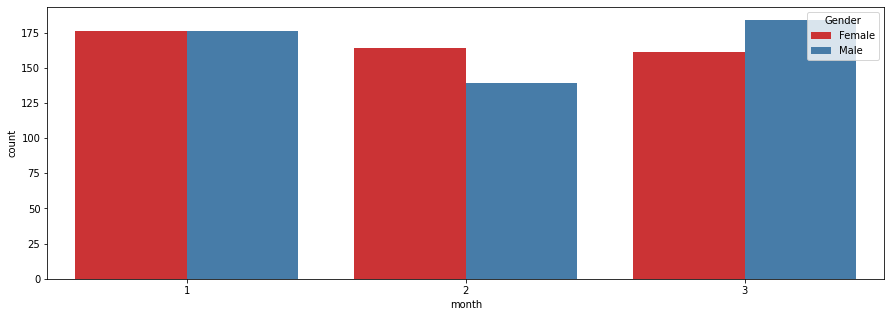

In [ ]:
 # 월별 성별 방문 횟수
plt.figure(figsize = (15,5))
sns.countplot(x='month',hue='Gender',data = train, palette = 'Set1')

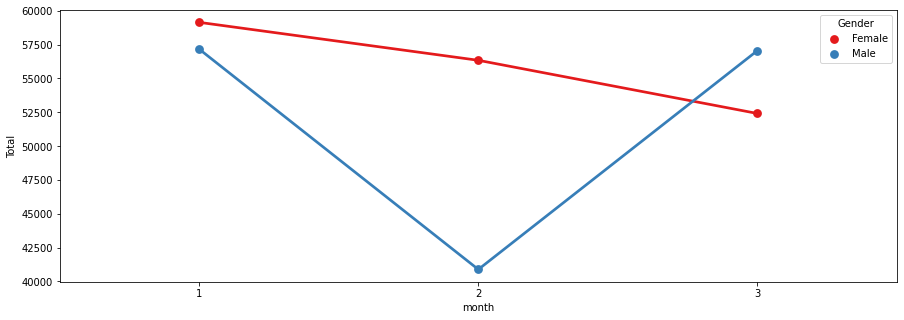

In [ ]:
# 월별 총 구매금액 - 성별
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='month', y='Total', ci = None, estimator = np.sum, hue ='Gender', palette = 'Set1')

* 월별 총 구매금액 그래프를 볼 떄, 남성의 경우 2월에 총 구매금액이 가장 작은 것을 확인할 수 있다.
* 여성의 경우에서는 1월부터 점차 구매금액이 줄어드는 것을 확인 할 수 있다.

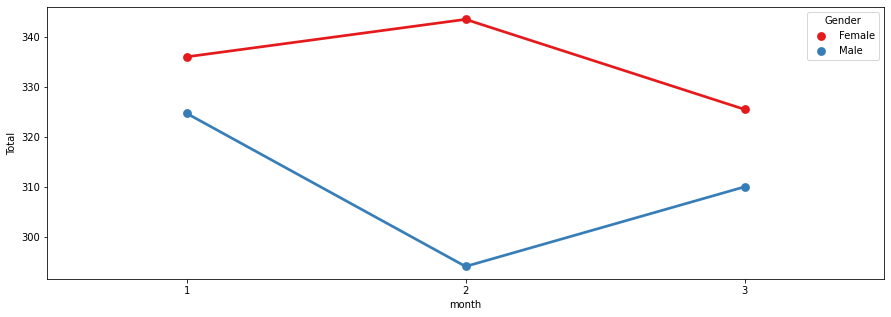

In [ ]:
# 월별 평균 구매금액 - 성별
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='month', y='Total', ci = None, estimator = np.mean, hue ='Gender', palette = 'Set1')

* 이와 다르게 여성의 경우에서는 2월의 평균 구매금액이 가장 높은 것을 확인 할 수 있다.

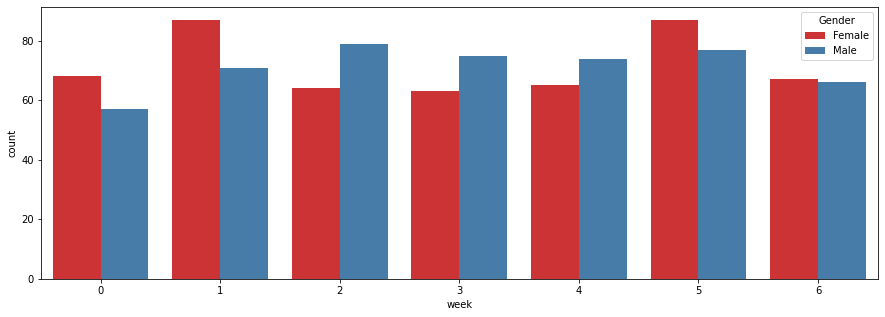

In [ ]:
 # 요일별 성별 방문 횟수
plt.figure(figsize = (15,5))
sns.countplot(x='week',hue='Gender',data = train, palette = 'Set1')

* 남성의 경우 수요일이 가장 높고 월요일이 가장 낮은 것을 볼 수 있다.
* 여성의 경우 화요일과 토요일이 높고 수요일과 목요일이 낮은 것을 볼 수 있다.

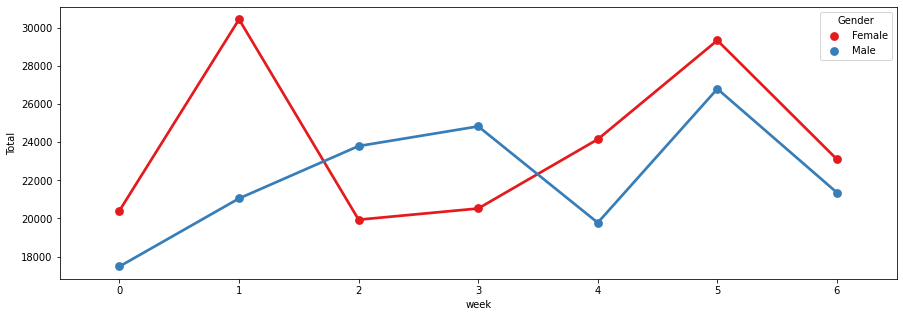

In [ ]:
# 요일별 총 구매금액 - 성별
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='week', y='Total', ci = None, estimator = np.sum, hue ='Gender', palette = 'Set1')

* 남성의 경우 토요일의 총 구매금액이 높으며 월요일이 낮은 것을 확인 할 수 있다.
* 여성의 경우 화요일 총 구매금액이 가장 높으며 그 다음은 토요일이 높은 것을 확인 할 수 있다. 그리고 수요일이 가장 낮은 것을 확인 할 수 있다.

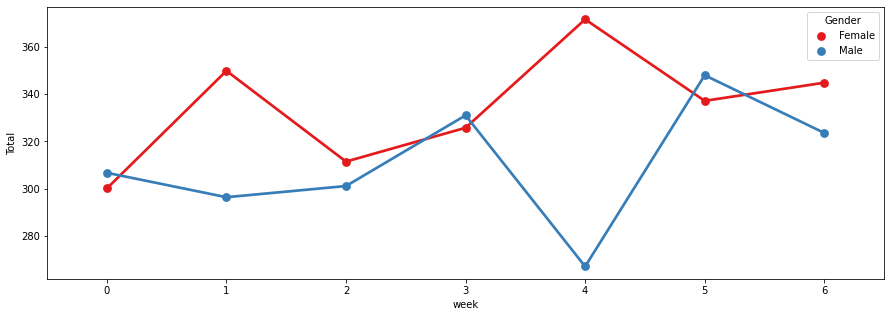

In [ ]:
# 요일별 평균 구매금액 - 성별
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='week', y='Total', ci = None, estimator = np.mean, hue ='Gender', palette = 'Set1')

* 남성의 경우 토요일이 평균 구매금액이 가장 높으며 금요일이 가장 낮은 것을 확인 할 수 있다.
* 여성의 경우 금요일이 가장 높으며 월요일이 가장 낮은 것을 확인 할 수 있다.

### 4. 평점 분석

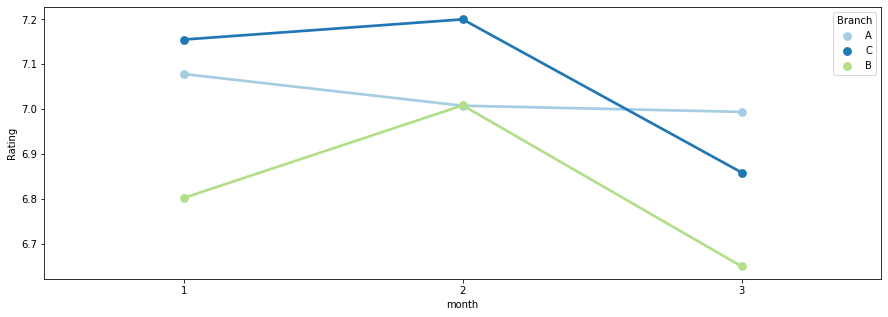

In [ ]:
# 월별 평점 평균 - 지점
plt.figure(figsize = (15,5))
sns.pointplot(data=train, x='month', y='Rating', ci = None, estimator = np.mean, hue ='Branch', palette = 'Paired') 

* A의 경우에서는 1월이 가장 높은 것을 확인 할 수 있으며 점차적으로 감소하는 추세이다.
* B의 경우에서는 2월의 평점이 가장 높으며 3월이 가장 낮은 것을 확인 할 수 있다.
* C의 경우에서는 2월이 가장 높은 것을 확인 할 수 있으며 3월이 가장 낮은 것을 확인 할 수 있다.